In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data.csv')

In [3]:
pd.options.display.max_columns = 50

In [4]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,...,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,...,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,...,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,25500000.0,0.458521,0.000790,0.0,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338,0.142803,0.022760,...,1.791094e-03,1.022676e-03,0.594502,7.610000e+08,0.671571,0.276179,0.446027,0.334777,0.117922,0.642765,0.459254,0.538491,0.314515,0.025346,0,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,1.078888e-04,0.0,0.465705,0.000449,0.0,0.154187,0.154187,0.154187,0.193722,0.321674,0.014368,0.077762,0.148603,0.022046,...,8.140000e+09,6.050000e+09,0.593889,2.030000e+09,0.671519,0.559144,0.615848,0.331509,0.120760,0.579039,0.448518,0.604105,0.302382,0.067250,0,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,7.890000e+09,0.0,0.462746,0.000686,0.0,0.167502,0.167502,0.167502,0.212537,0.319162,0.029690,0.096898,0.168412,0.022096,...,6.680000e+09,5.050000e+09,0.593915,8.240000e+08,0.671563,0.309555,0.975007,0.330726,0.110933,0.622374,0.454411,0.578469,0.311567,0.047725,0,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [5]:
df.shape

(6819, 96)

In [7]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,...,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,...,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.115001,0.190661,0.190633,0.190672,0.228813,0.323482,1.328641e+06,0.109091,0.184361,0.022408,...,1.195856e+09,2.163735e+09,0.594006,2.471977e+09,0.671531,1.220121e+06,0.761599,0.331410,0.115645,0.649731,0.461849,0.593415,0.315582,0.031506,0.001173,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,0.012679,3.237684e+09,2.598292e+09,0.017036,1.082750e+08,0.138667,0.033390,0.033474,0.033480,0.033263,0.017611,5.170709e+07,0.027942,0.033180,0.012079,...,2.821161e+09,3.374944e+09,0.008959,2.938623e+09,0.009341,1.007542e+08,0.206677,0.013488,0.019529,0.047372,0.029943,0.058561,0.012961,0.030845,0.034234,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,0.781567,1.566874e-04,1.281880e-04,0.461558,2.030203e-04,0.000000,0.173613,0.173613,0.173676,0.214711,0.317748,1.563138e-02,0.096083,0.170370,0.022065,...,1.456236e-04,1.417149e-04,0.593934,2.735337e-04,0.671565,8.536037e-02,0.626981,0.328096,0.110933,0.633265,0.457116,0.565987,0.312995,0.018034,0.000000,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,

#### looking at the data we can see that majority of the data is scaled. But let us check if all of the columns are feature scaled or not

In [11]:
count = 0
not_scaled = []
for col in df.columns:
    if max(df[col])>1:
        print("not scaled : ", col)
        count += 1
        not_scaled.append(col)

not scaled :   Operating Expense Rate
not scaled :   Research and development expense rate
not scaled :   Interest-bearing debt interest rate
not scaled :   Revenue Per Share (Yuan ¥)
not scaled :   Total Asset Growth Rate
not scaled :   Net Value Growth Rate
not scaled :   Current Ratio
not scaled :   Quick Ratio
not scaled :   Total debt/Total net worth
not scaled :   Accounts Receivable Turnover
not scaled :   Average Collection Days
not scaled :   Inventory Turnover Rate (times)
not scaled :   Fixed Assets Turnover Frequency
not scaled :   Revenue per person
not scaled :   Allocation rate per person
not scaled :   Quick Assets/Current Liability
not scaled :   Cash/Current Liability
not scaled :   Inventory/Current Liability
not scaled :   Long-term Liability to Current Assets
not scaled :   Current Asset Turnover Rate
not scaled :   Quick Asset Turnover Rate
not scaled :   Cash Turnover Rate
not scaled :   Fixed Assets to Assets
not scaled :   Total assets to GNP price


In [12]:
len(not_scaled)

24

### above is the list of data that are not in scale. So we will use MinMaxScaler 

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[not_scaled] = scaler.fit_transform(df[not_scaled])

In [14]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,...,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.258227e-14,0.000000,0.458143,7.323965e-13,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,5.814497e-12,0.095921,0.138736,0.022102,...,7.010000e-02,6.550000e-01,0.593831,0.0458,0.671568,5.098627e-11,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,9.388432e-13,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.900751e-14,0.000000,0.461867,6.536007e-13,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,7.001435e-12,0.093722,0.169918,0.022080,...,1.065198e-14,7.700000e-01,0.593916,0.2490,0.671570,5.634953e-11,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,8.475867e-13,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.363661e-14,0.002555,0.458521,7.980596e-13,0.0,0.177911,0.177911,0.193713,0.180581,0.307102,1.968215e-12,0.092338,0.142803,0.022760,...,1.791094e-13,1.022676e-13,0.594502,0.0761,0.671571,3.319462e-11,0.446027,0.334777,0.117922,0.642765,0.459254,0.538491,0.314515,0.025346,0,0.774670,4.073610e-12,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,1.079968e-14,0.000000,0.465705,4.535807e-13,0.0,0.154187,0.154187,0.154187,0.193722,0.321674,4.757771e-12,0.077762,0.148603,0.022046,...,8.140000e-01,6.050000e-01,0.593889,0.2030,0.671519,6.720480e-11,0.615848,0.331509,0.120760,0.579039,0.448518,0.604105,0.302382,0.067250,0,0.739555,3.312093e-13,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,7.897898e-01,0.000000,0.462746,6.929986e-13,0.0,0.167502,0.167502,0.167502,0.212537,0.319162,9.831057e-12,0.096898,0.168412,0.022096,...,6.680000e-01,5.050000e-01,0.593915,0.0824,0.671563,3.720612e-11,0.975007,0.330726,0.110933,0.622374,0.454411,0.578469,0.311567,0.047725,0,0.795016,3.948639e-13,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


### Checking for missing values

<AxesSubplot:>

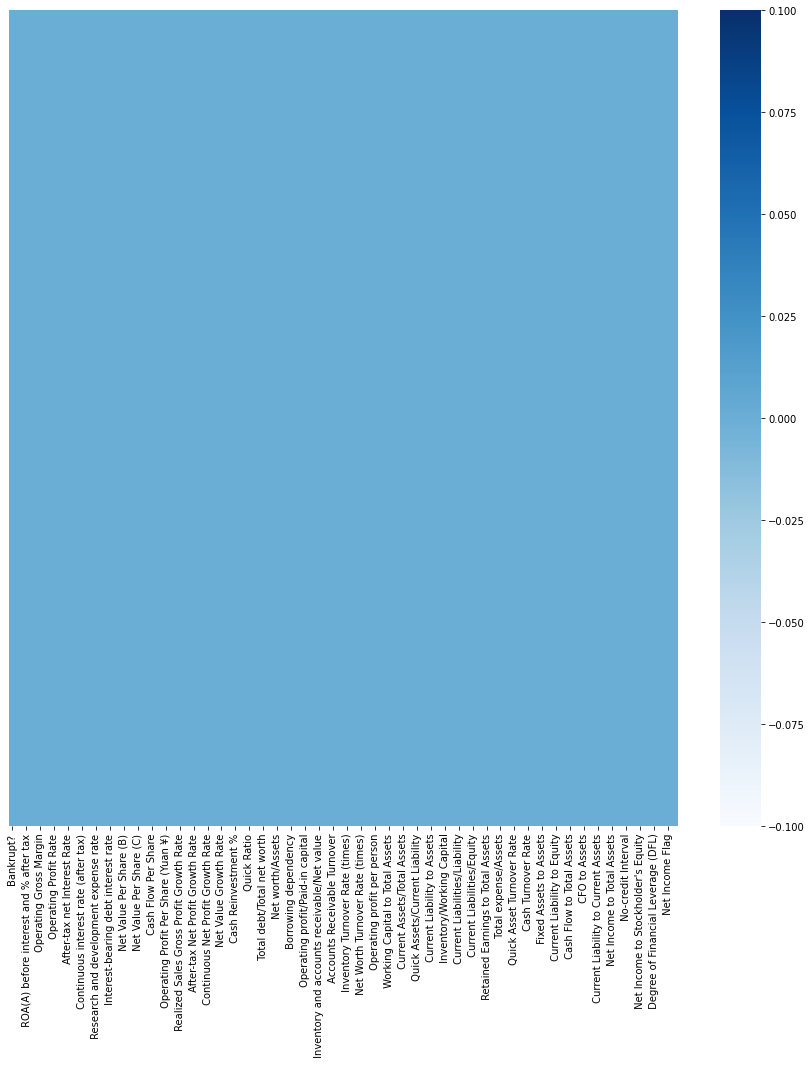

In [15]:
plt.figure(figsize = (15,15))
sns.heatmap(df.isnull(), cmap = 'Blues', yticklabels = False)

<AxesSubplot:>

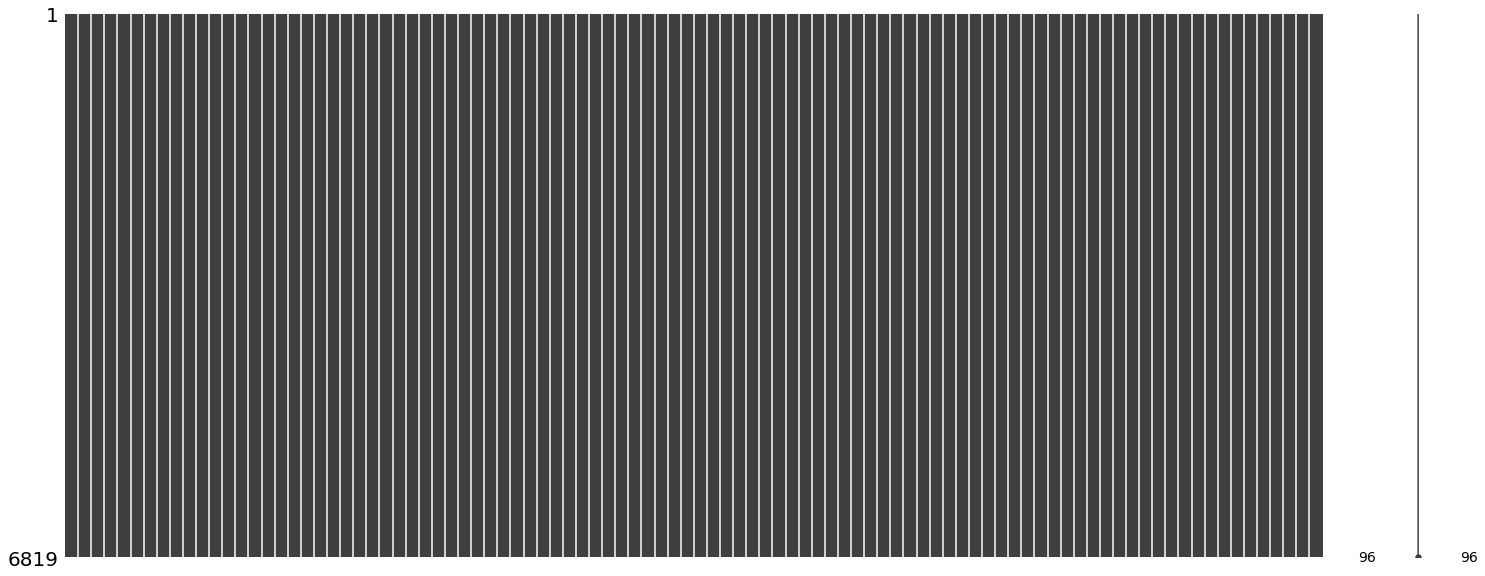

In [16]:
msno.matrix(df)

### correlation

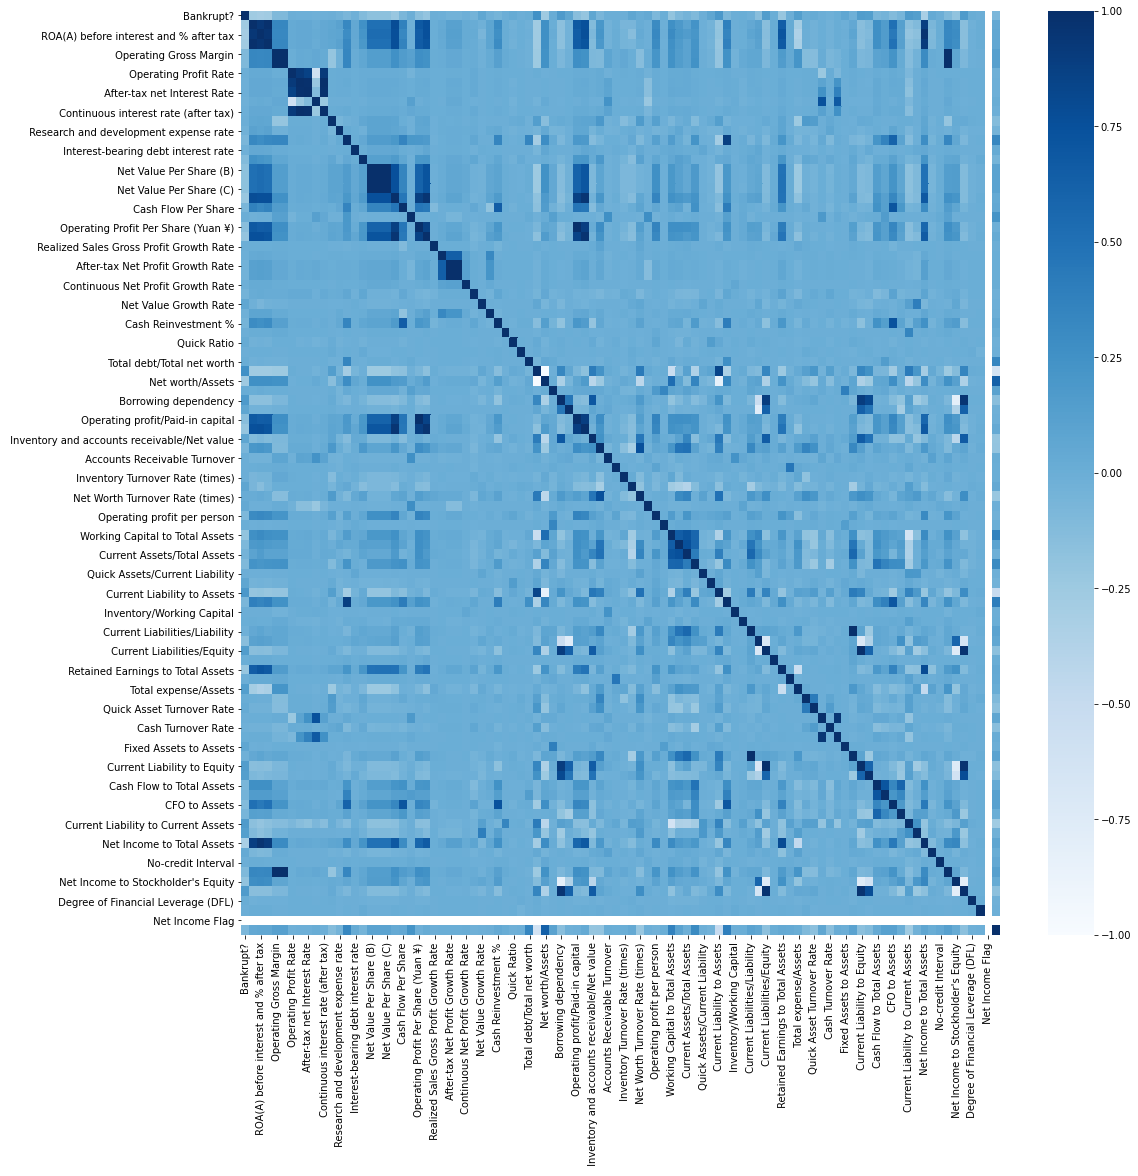

In [17]:
plt.figure(figsize=(17,17))
sns.heatmap(df.corr(), annot=False, cmap='Blues')
plt.show()

### countplot for bankrupt column

<AxesSubplot:xlabel='Bankrupt?', ylabel='count'>

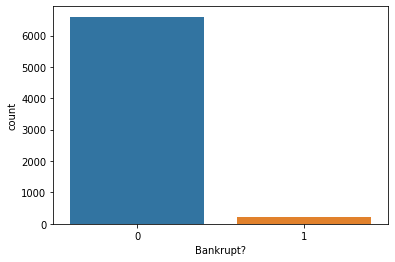

In [18]:
sns.countplot(df['Bankrupt?'])

- We can see that the data is highly imbalanced

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

In [20]:
X = df.drop('Bankrupt?', axis = 1)
y = df['Bankrupt?']

#### The below code is to balance the data

In [21]:
sm = SMOTE()
X_sm,y_sm = sm.fit_resample(X,y)

In [23]:
y.value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [24]:
y_sm.value_counts()

1    6599
0    6599
Name: Bankrupt?, dtype: int64

### splitting the data

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 0)

# SVM

Train score: 0.9017806402727789
Accuracy score: 0.9049242424242424
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1269
           1       0.90      0.92      0.91      1371

    accuracy                           0.90      2640
   macro avg       0.91      0.90      0.90      2640
weighted avg       0.91      0.90      0.90      2640



<AxesSubplot:>

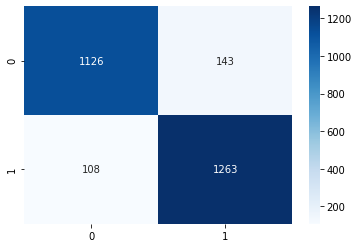

In [26]:
from sklearn.svm import SVC
svc = SVC(gamma='auto',C=20, kernel='rbf', probability=True)

svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
print("Train score: {}" .format(svc.score(X_train,y_train)))
print("Accuracy score: {}" .format(accuracy_score(y_test,svc_pred)))
print(classification_report(y_test, svc_pred))
sns.heatmap(confusion_matrix(y_test,svc_pred), annot = True, cmap='Blues',fmt = 'd')

# Random Forest Classifier

Train score: 1.0
Accuracy score: 0.9829545454545454
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1269
           1       0.97      1.00      0.98      1371

    accuracy                           0.98      2640
   macro avg       0.98      0.98      0.98      2640
weighted avg       0.98      0.98      0.98      2640



<AxesSubplot:>

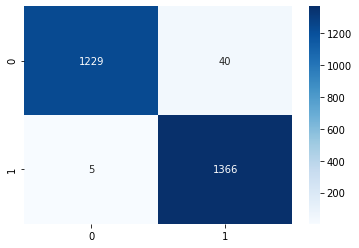

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
print("Train score: {}" .format(rfc.score(X_train,y_train)))
print("Accuracy score: {}" .format(accuracy_score(y_test,rfc_pred)))
print(classification_report(y_test, rfc_pred))
sns.heatmap(confusion_matrix(y_test,rfc_pred), annot = True, cmap='Blues',fmt = 'd')

# Logistic Regression

Train score: 0.8924038643682516
Accuracy score: 0.8946969696969697
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1269
           1       0.89      0.91      0.90      1371

    accuracy                           0.89      2640
   macro avg       0.89      0.89      0.89      2640
weighted avg       0.89      0.89      0.89      2640



<AxesSubplot:>

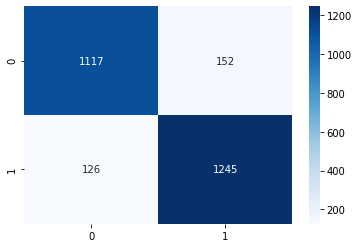

In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
print("Train score: {}" .format(lr.score(X_train,y_train)))
print("Accuracy score: {}" .format(accuracy_score(y_test,lr_pred)))
print(classification_report(y_test, lr_pred))
sns.heatmap(confusion_matrix(y_test,lr_pred), annot = True, cmap='Blues',fmt = 'd')

# KNN

Train score: 0.9793521500284145
Accuracy score: 0.9579545454545455
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      1269
           1       0.93      1.00      0.96      1371

    accuracy                           0.96      2640
   macro avg       0.96      0.96      0.96      2640
weighted avg       0.96      0.96      0.96      2640



<AxesSubplot:>

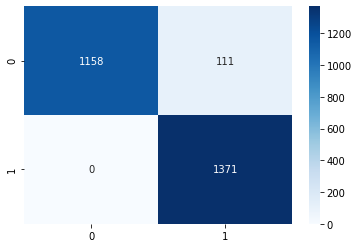

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4, algorithm='auto')
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
print("Train score: {}" .format(knn.score(X_train,y_train)))
print("Accuracy score: {}" .format(accuracy_score(y_test,knn_pred)))
print(classification_report(y_test, knn_pred))
sns.heatmap(confusion_matrix(y_test,knn_pred), annot = True, cmap='Blues',fmt = 'd')